In [190]:
#Progetto 2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import chi2


# Le formule sono:

# y = t0 * x^t1 (non si può risolvere analiticamente perché non lineare nei parametri)
def f1(x,t0,t1):
    return t0 * x**t1

# y = t0 + t1*x + t2*x^2
def f2(x,t0,t1,t2):
    return t0 + t1*x + t2*x**2

# y = t0 + t1*x + t2*exp(x)
def f3(x,t0,t1,t2):
    return t0 + t1*x + t2*np.exp(x)

# Dati del progetto
X = np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
Y = np.array([2.3,4.8,4.1,7.2,8.8,11.0,14.6,20.6,26.7])
y_std = np.array([0.9,0.8,0.8,0.9,0.9,0.9,0.9,1.2,0.5])

Parametro t0 stimato per f1: 1.777 ± 0.220
Parametro t1 stimato per f1: 1.787 ± 0.087
Il valore del chi-quadro è: 30.293
Il p-value ottenuto è: 8.38853252909044e-05
Il chi quadro ridotto è: 4.328


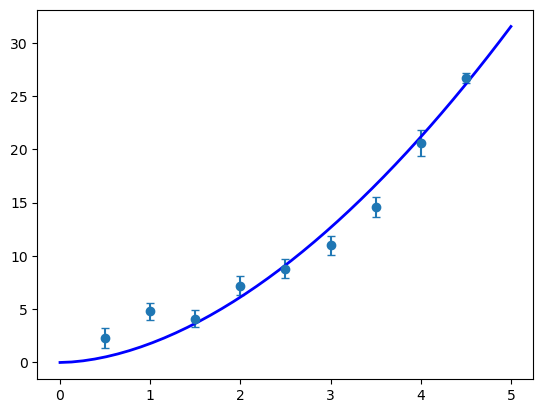

In [191]:
# Prima formula
#y = t0 * x^t1
# Utilizzeremo un approccio numerico perché non si può risolvere analiticamente

# popt conterrà i valori ottimali dei parametri (t0, t1)
# pcov conterrà la matrice di covarianza dei parametri
popt, pcov = sp.optimize.curve_fit(f1, X, Y, sigma=y_std, absolute_sigma=True)

# Estrazione dei parametri stimati
t0, t1 = popt

# Stampa dei risultati
print(f"Parametro t0 stimato per f1: {t0:.3f} ± {np.sqrt(pcov[0][0]):.3f}")
print(f"Parametro t1 stimato per f1: {t1:.3f} ± {np.sqrt(pcov[1][1]):.3f}")
#print(f"Matrice di covarianza per f1:\n{pcov}")

# Calcolo del chi quadro
chi_quadro = np.sum(((Y - f1(X, t0, t1)) / y_std)**2)
# Un valore di chi-quadro "buono" è generalmente vicino al 
# numero di gradi di libertà (df), che in questo caso è il 
# numero di punti dati (9) meno il numero di parametri stimati (2), quindi df = 7.
df = len(X)-2
# calcolo p-value
p_value = chi2.sf(chi_quadro, df)
chi_quadro_ridotto = chi_quadro/df

print(f"Il valore del chi-quadro è: {chi_quadro:.3f}")
print(f"Il p-value ottenuto è: {p_value}")
print(f"Il chi quadro ridotto è: {chi_quadro_ridotto:.3f}")

# Plot dei punti dai dati
#plt.scatter(X,Y)
plt.errorbar(X, Y, yerr=y_std, fmt='o', capsize=3)

# Plot funzione con t0 e t1 stimati
plot_x = np.linspace(0,5,40)
plot_y = f1(plot_x,t0,t1)
plt.plot(plot_x,plot_y,lw=2,c='blue',label = 'regression line')

In [192]:
# Definizione delle funzioni per generare le matrici di vondermonde

# Questa non fa altro che inserire nella prima colonna le x^0
# nella seconda colonna le x^1
# nella terza colonna le x^2
# e così via in caso di più parametri
# Questa va bene nel caso in cui la formula sia polinomiale, cioé per la seconda formula
def calcola_A_2(x,numero_param):
    A = np.zeros((len(x), numero_param))
    for i in range(numero_param): 
        A[:, i] = x**i
    return A

# In questo caso dato che la formula non è polinomiale 
# nella terza colonna ci mettiamo l'esponenziale
def calcola_A_3(x):
    numero_param = 3
    A = np.zeros((len(x), numero_param))
    A[:, 0] = 1
    A[:, 1] = x
    A[:, 2] = np.exp(x)
    return A
 
    
# Definizione funzioni per il calcolo di theta, matrice di covarianza e chi quadro

# Calcolo dei parametri theta
def calcola_parametri_theta(A,V,Y):
    return np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(A.T, np.linalg.inv(V)), A)), A.T), np.linalg.inv(V)), Y)

# Calcolo matrice di covarianza
def calcola_matrice_cov(A,V):
    return np.linalg.inv(np.dot(np.dot(A.T, np.linalg.inv(V)), A))

# Calcolo chi quadro
def calcola_chi_quadro(A,V,theta_array):
    return np.dot(np.transpose(Y - np.dot(A, theta_array)), np.dot(np.linalg.inv(V), (Y - np.dot(A, theta_array))))
    



Parametro t0 stimato per f2: 4.357 ± 1.087
Parametro t1 stimato per f2: -2.389 ± 0.966
Parametro t2 stimato per f2: 1.621 ± 0.176
Il valore del chi-quadro è: 9.119
Il p-value ottenuto è: 0.166972766687095
Il chi quadro ridotto è: 1.520


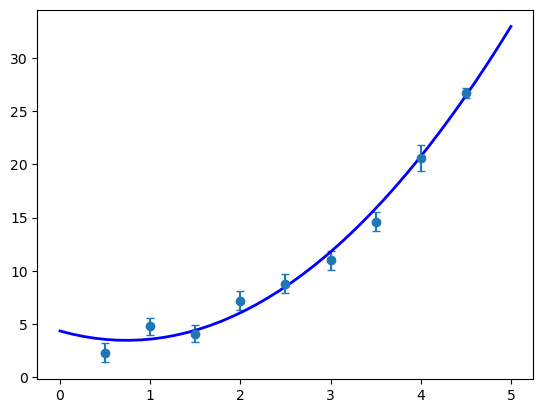

In [193]:
# Seconda formula
# y = t0 + t1*x + t2*x^2
# Utilizzeremo un approccio analitico perché è possibile, dato che lineare nei parametri

# Per affrontare il problema con l'approccio analitico non dobbiamo fare altro che calcolarci 
# la matrice di vandermonde (A) e la matrice di correlazione (V). 
# Una volta fatto ciò applichiamo la formula per calcolare i parametri.

# Calcolo la matrice di Vondermonde
A = calcola_A_2(X,3)
# Calcolo matrice di correlazione
V = np.diag(y_std**2)

# Calcolo i parametri theta
theta_array = calcola_parametri_theta(A,V,Y)
# Calcolo matrice di covarianza
U = calcola_matrice_cov(A,V)
# Calcolo il chi_quadro
chi_quadro = calcola_chi_quadro(A,V,theta_array)

# degree of freedom
df = len(X)-3
# Calcolo p_value
p_value = chi2.sf(chi_quadro, df)
# Calcolo chi_quadro_ridotto
chi_quadro_ridotto = chi_quadro/df

# Stampa dei risultati
print(f"Parametro t0 stimato per f2: {theta_array[0]:.3f} ± {np.sqrt(U[0][0]):.3f}")
print(f"Parametro t1 stimato per f2: {theta_array[1]:.3f} ± {np.sqrt(U[1][1]):.3f}")
print(f"Parametro t2 stimato per f2: {theta_array[2]:.3f} ± {np.sqrt(U[2][2]):.3f}")
#print(f"Matrice di covarianza per f2:\n{U}")
print(f"Il valore del chi-quadro è: {chi_quadro:.3f}")
print(f"Il p-value ottenuto è: {p_value}")
print(f"Il chi quadro ridotto è: {chi_quadro_ridotto:.3f}")

# Plot dei punti dai dati
#plt.scatter(X,Y)
plt.errorbar(X, Y, yerr=y_std, fmt='o', capsize=3)

# Plot funzione con t0, t1 e t2 stimati
plot_x = np.linspace(0,5,40)
plot_y_2 = f2(plot_x,theta_array[0],theta_array[1],theta_array[2])
plt.plot(plot_x,plot_y_2,lw=2,c='blue',label = 'regression line')


Parametro t0 stimato per f3: 1.140 ± 0.805
Parametro t1 stimato per f3: 2.202 ± 0.476
Parametro t2 stimato per f3: 0.175 ± 0.019
Il valore del chi-quadro è: 4.685
Il p-value ottenuto è: 0.5847642937954405
Il chi quadro ridotto è: 0.781


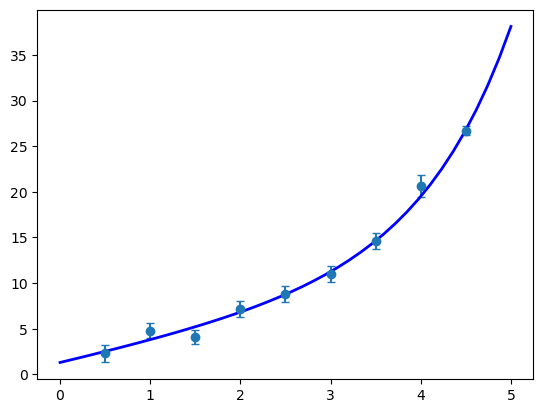

In [194]:
# Terza formula
# y = t0 + t1*x + t2*exp(x)
# Utilizzeremo un approccio analitico perché è possibile, dato che lineare nei parametri

# Per affrontare il problema con l'approccio analitico non dobbiamo fare altro che calcolarci 
# la matrice di vandermonde (A) e la matrice di correlazione (V). 
# Una volta fatto ciò applichiamo la formula per calcolare i parametri.

# Calcolo la matrice di Vondermonde
A = calcola_A_3(X)
# Calcolo matrice di correlazione
V = np.diag(y_std**2)

# Calcolo i parametri theta
theta_array = calcola_parametri_theta(A,V,Y)
# Calcolo matrice di covarianza
U = calcola_matrice_cov(A,V)
# Calcolo il chi_quadro
chi_quadro = calcola_chi_quadro(A,V,theta_array)

# degree of freedom
df = len(X)-3
# Calcolo p_value
p_value = chi2.sf(chi_quadro, df)
# Calcolo chi_quadro_ridotto
chi_quadro_ridotto = chi_quadro/df

# Stampa dei risultati
print(f"Parametro t0 stimato per f3: {theta_array[0]:.3f} ± {np.sqrt(U[0][0]):.3f}")
print(f"Parametro t1 stimato per f3: {theta_array[1]:.3f} ± {np.sqrt(U[1][1]):.3f}")
print(f"Parametro t2 stimato per f3: {theta_array[2]:.3f} ± {np.sqrt(U[2][2]):.3f}")
#print(f"Matrice di covarianza per f3:\n{U}")
print(f"Il valore del chi-quadro è: {chi_quadro:.3f}")
print(f"Il p-value ottenuto è: {p_value}")
print(f"Il chi quadro ridotto è: {chi_quadro_ridotto:.3f}")

# Plot dei punti dai dati
#plt.scatter(X,Y)
plt.errorbar(X, Y, yerr=y_std, fmt='o', capsize=3)

# Plot funzione con t0, t1 e t2 stimati
plot_x = np.linspace(0,5,40)
plot_y_3 = f3(plot_x,theta_array[0],theta_array[1],theta_array[2])
plt.plot(plot_x,plot_y_3,lw=2,c='blue',label = 'regression line')


La terza funzione è quella con il p-value più alto, quindi è quella che si adatta meglio ai dati, in questo grafico è la linea blu


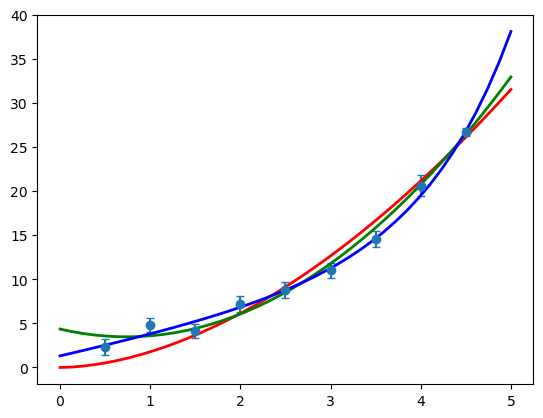

In [195]:
# Conclusione

plt.errorbar(X, Y, yerr=y_std, fmt='o', capsize=3)
plt.plot(plot_x,plot_y,lw=2,c='red',label = 'regression line')
plt.plot(plot_x,plot_y_2,lw=2,c='green',label = 'regression line')
plt.plot(plot_x,plot_y_3,lw=2,c='blue',label = 'regression line')

print("La terza funzione è quella con il p-value più alto, quindi è quella che si adatta meglio ai dati, in questo grafico è la linea blu")